In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import cv2

(<matplotlib.axes._subplots.AxesSubplot at 0x1038e4bd0>,
 <matplotlib.image.AxesImage at 0x10ee59f50>)

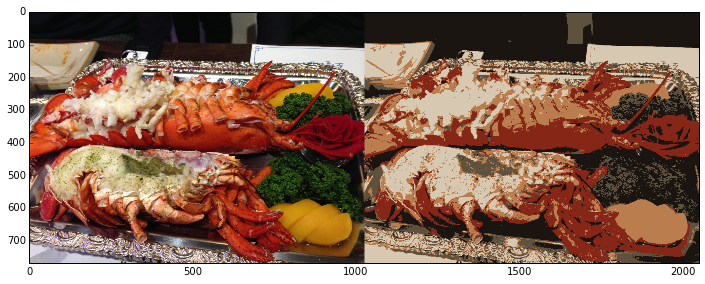

In [13]:
# load the image and grab its width and height
image = cv2.imread("./data/IMG_3654_1024.jpg")
(h, w) = image.shape[:2]

# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))

# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 5)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2RGB)
image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB)

# display the images and wait for a keypress
plt.figure(figsize=(12,8))
plt.subplot(111), plt.imshow(np.hstack([image, quant]))
